In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=4e7917a8a93c95dc38f0c903e59f02207876ee19950821f120dc764a9b55563b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Saving dataset excell.xlsx to dataset excell.xlsx


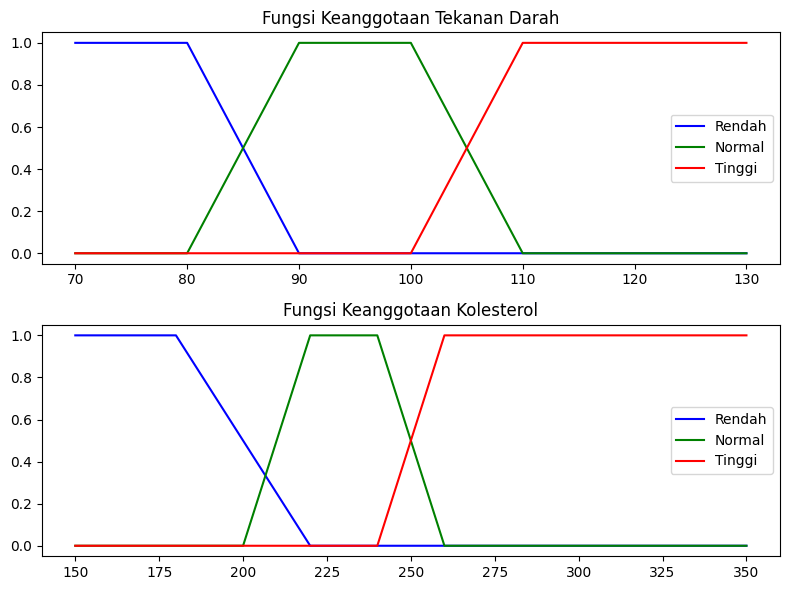

Risiko penyakit jantung (Rendah): 0.00
Risiko penyakit jantung (Agak Rendah): 0.00
Risiko penyakit jantung (Sedang): 0.62
Risiko penyakit jantung (Agak Tinggi): 0.12
Risiko penyakit jantung (Tinggi): 0.25


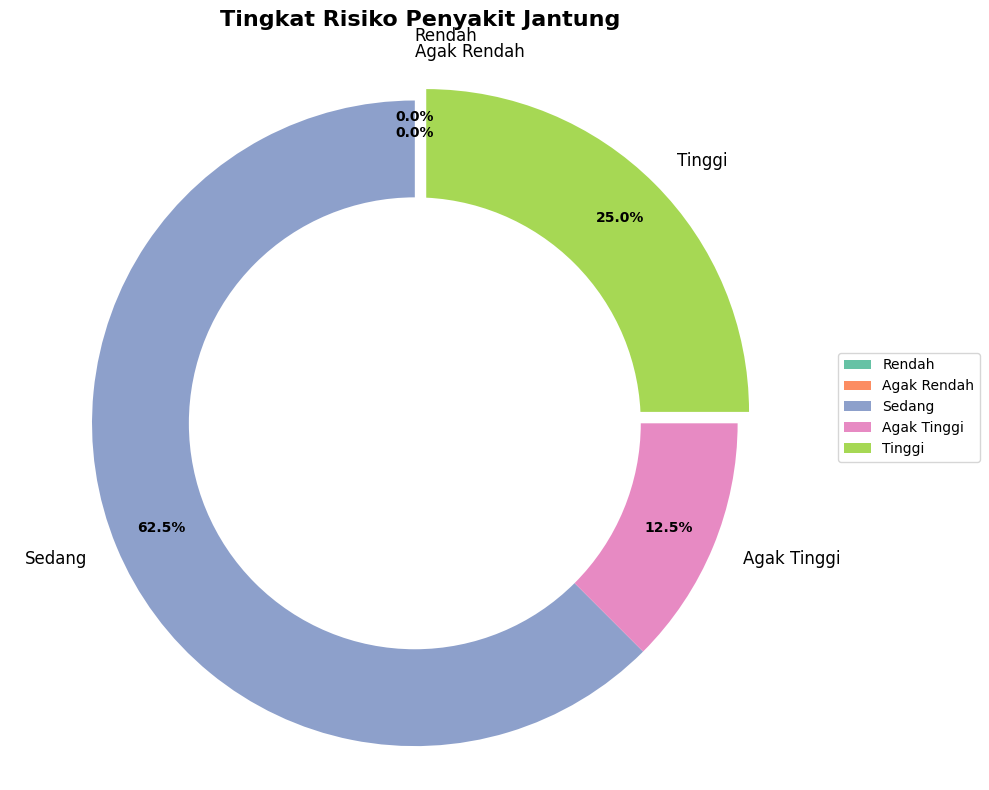

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Definisikan rentang variabel input
x_tekanan_darah = np.arange(70, 131, 1)
x_kolesterol = np.arange(150, 351, 1)

# Definisikan fungsi keanggotaan untuk Tekanan Darah
tekanan_darah_rendah = fuzz.trapmf(x_tekanan_darah, [70, 70, 80, 90])
tekanan_darah_normal = fuzz.trapmf(x_tekanan_darah, [80, 90, 100, 110])
tekanan_darah_tinggi = fuzz.trapmf(x_tekanan_darah, [100, 110, 130, 130])

# Definisikan fungsi keanggotaan untuk Kolesterol
kolesterol_rendah = fuzz.trapmf(x_kolesterol, [150, 150, 180, 220])
kolesterol_normal = fuzz.trapmf(x_kolesterol, [200, 220, 240, 260])
kolesterol_tinggi = fuzz.trapmf(x_kolesterol, [240, 260, 350, 350])

# Visualisasikan fungsi keanggotaan
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 6))

ax0.plot(x_tekanan_darah, tekanan_darah_rendah, 'b', linewidth=1.5, label='Rendah')
ax0.plot(x_tekanan_darah, tekanan_darah_normal, 'g', linewidth=1.5, label='Normal')
ax0.plot(x_tekanan_darah, tekanan_darah_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax0.set_title('Fungsi Keanggotaan Tekanan Darah')
ax0.legend()

ax1.plot(x_kolesterol, kolesterol_rendah, 'b', linewidth=1.5, label='Rendah')
ax1.plot(x_kolesterol, kolesterol_normal, 'g', linewidth=1.5, label='Normal')
ax1.plot(x_kolesterol, kolesterol_tinggi, 'r', linewidth=1.5, label='Tinggi')
ax1.set_title('Fungsi Keanggotaan Kolesterol')
ax1.legend()

plt.tight_layout()
plt.show()

def tsukamoto(tekanan_darah, kolesterol):
    # Fuzzification
    td_rendah = fuzz.interp_membership(x_tekanan_darah, tekanan_darah_rendah, tekanan_darah)
    td_normal = fuzz.interp_membership(x_tekanan_darah, tekanan_darah_normal, tekanan_darah)
    td_tinggi = fuzz.interp_membership(x_tekanan_darah, tekanan_darah_tinggi, tekanan_darah)

    kol_rendah = fuzz.interp_membership(x_kolesterol, kolesterol_rendah, kolesterol)
    kol_normal = fuzz.interp_membership(x_kolesterol, kolesterol_normal, kolesterol)
    kol_tinggi = fuzz.interp_membership(x_kolesterol, kolesterol_tinggi, kolesterol)

    # Rules with weights
    rendah = np.fmin(td_rendah, kol_rendah) * 0.8
    agak_rendah = np.fmin(td_rendah, kol_normal) * 0.7
    sedang = np.fmax(np.fmin(td_normal, kol_normal),
                     np.fmax(np.fmin(td_rendah, kol_tinggi), np.fmin(td_tinggi, kol_rendah))) * 1.0
    agak_tinggi = np.fmin(td_tinggi, kol_normal) * 0.1
    tinggi = np.fmax(td_tinggi, kol_tinggi) * 0.1

    # Normalize results
    total = rendah + agak_rendah + sedang + agak_tinggi + tinggi
    rendah /= total
    agak_rendah /= total
    sedang /= total
    agak_tinggi /= total
    tinggi /= total

    return rendah, agak_rendah, sedang, agak_tinggi, tinggi

# Test with new data
tekanan_darah_test = 120
kolesterol_test = 210

hasil = tsukamoto(tekanan_darah_test, kolesterol_test)
labels = ['Rendah', 'Agak Rendah', 'Sedang', 'Agak Tinggi', 'Tinggi']

for label, value in zip(labels, hasil):
    print(f"Risiko penyakit jantung ({label}): {value:.2f}")

# Visualisasi hasil
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
explode = (0.1, 0.05, 0, 0, 0.05)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(hasil,
                                  explode=explode,
                                  labels=labels,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  pctdistance=0.85)

# Menyesuaikan properti teks
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# Menambahkan lingkaran di tengah untuk efek donat
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title("Tingkat Risiko Penyakit Jantung", size=16, fontweight='bold')

# Menambahkan legenda dengan penjelasan
legend_elements = [plt.Rectangle((0,0),1,1, fc=color, edgecolor='none') for color in colors]
ax.legend(legend_elements, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()
